<a href="https://colab.research.google.com/github/Chitraxi-Porwal/Dog-v-s-Cat-Classifier-using-CNN/blob/main/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:07<00:00, 145MB/s]


In [ ]:
train="/content/dogs-vs-cats/train"
test="/content/dogs-vs-cats/test"

In [ ]:
!pip install tensorflow

In [ ]:
# import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
# load training data
train_data=keras.utils.image_dataset_from_directory(
    directory=train,
    labels="inferred",     # folder name cats, dogs
    label_mode="int",      # 0,1
    batch_size=32,
    image_size=(256,256)   # resize
)

test_data=keras.utils.image_dataset_from_directory(
    directory=test,
    labels="inferred",     # folder name cats, dogs
    label_mode="int",      # 0,1
    batch_size=32,
    image_size=(256,256)   # resize
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# normaliztion
def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label

train_data=train_data.map(process)
test_data=test_data.map(process)

In [ ]:
# create model
model=Sequential() #layer by layer

# 1st processing
#conv2d : extract feature line edge pattern
model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
# maxpooling2d
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

# 2nd
#conv2d : extract feature line edge pattern
model.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"))
# maxpooling2d
model.add(MaxPooling2D(pool_size=(2
                                  ,2), strides=2, padding="valid"))

# 3rd
#conv2d : extract feature line edge pattern
model.add(Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"))
# maxpooling2d
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

# convert 2d to 1d
model.add(Flatten())

# dense layer with dropout
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history=model.fit(train_data, epochs=15, validation_data=test_data)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 74ms/step - accuracy: 0.5625 - loss: 0.7015 - val_accuracy: 0.7328 - val_loss: 0.5389
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.7292 - loss: 0.5341 - val_accuracy: 0.7652 - val_loss: 0.4813
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 74ms/step - accuracy: 0.7918 - loss: 0.4448 - val_accuracy: 0.7928 - val_loss: 0.5092
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.8563 - loss: 0.3275 - val_accuracy: 0.7918 - val_loss: 0.5718
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.9261 - loss: 0.1894 - val_accuracy: 0.7872 - val_loss: 0.8277
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9597 - loss: 0.1101 - val_accuracy: 0.7912 - val_loss: 1.0481
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9709 - loss: 0.0856 - val_accuracy: 0.7918 - val_loss: 0.9791
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.9832 - loss: 0.0550 - 

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

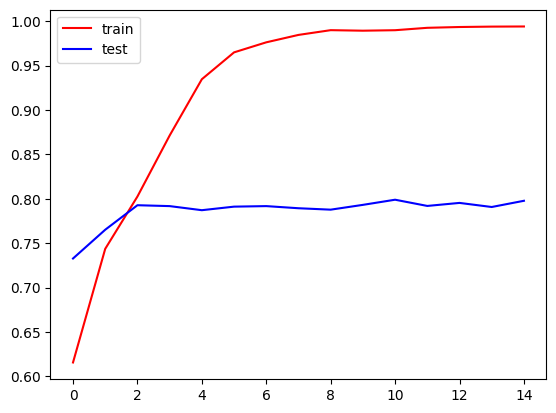

In [ ]:
# plot the accuracy train-test
plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="test")
plt.legend()
plt.show()

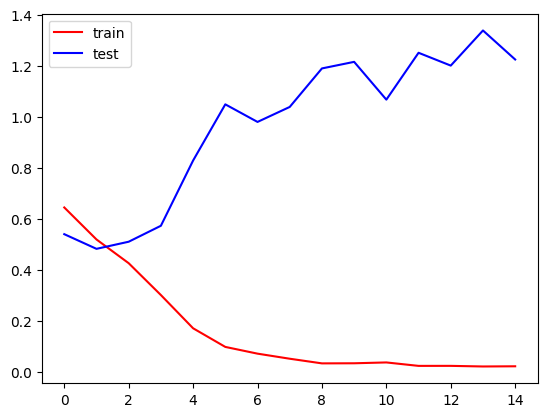

In [ ]:
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="test")
plt.legend()
plt.show()

In [ ]:
# user input predict
img_path='/content/dogs-vs-cats/train/cats/cat.0.jpg'
img=keras.utils.load_img(img_path, target_size=(256,256))

#convert to array
img_array=keras.utils.img_to_array(img)

# normalize
img_array=img_array/255.0

# expand dims to convert to batch shape
img_array=np.expand_dims(img_array, axis=0)

prob=model.predict(img_array)[0][0]
print(f"Probability: {prob}")

Pred_class=1 if prob>0.5 else 0
print(f"Predicted class: {Pred_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step
Probability: 5.373089879867621e-05
Predicted class: 0


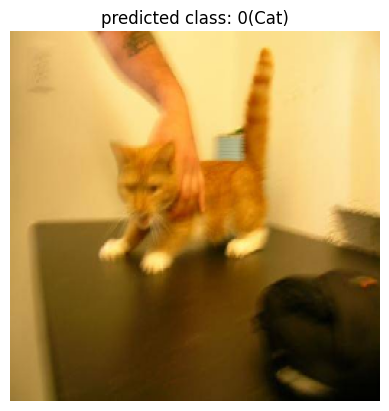

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.title(f'predicted class: {Pred_class}({"Dog" if Pred_class==1 else "Cat"})')
plt.show()

In [ ]:
model.save("catvsdog.h5")